### 딥러닝 데이터 프레임

In [1]:
# 1. 필요한 라이브러리 임포트
# TensorFlow와 Keras의 기능을 사용하기 위해 필요한 모듈을 불러옵니다.
import numpy as np
from tensorflow.keras.models import Sequential # 순차적 모델을 생성하기 위한 모듈. 각 계층에 대한 정의
from tensorflow.keras.layers import Dense # 밀집층(fully connected layer)을 추가하기 위한 모듈
from sklearn.model_selection import train_test_split # 데이터를 학습/테스트 세트로 나누기 위한 모듈
from sklearn.datasets import make_classification # 예제 데이터셋 생성 모듈

In [2]:
# 2. 데이터 생성 및 전처리
# 예제용으로 가상 데이터셋을 생성합니다.
X, y = make_classification(
n_samples=1000, # 데이터 샘플 수
n_features=20, # 특징(특성) 수
n_classes=2, # 클래스 수 (이진 분류)
random_state=42 # 랜덤 시드 고정 (결과 재현 가능성 보장)
)
# 데이터를 학습용(train)과 테스트용(test)으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 3. 모델 생성
# Sequential()은 모델을 레이어 순서대로 구성할 수 있도록 해줍니다.
model = Sequential([
Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # 첫 번째 은닉층
Dense(8, activation='relu'), # 두 번째 은닉층
Dense(1, activation='sigmoid') # 출력층 (이진 분류에서 사용)
])
# 여기서 `input_shape`는 입력 데이터의 차원을 지정합니다.
# `activation`은 각 층에서 사용할 활성화 함수입니다.
# - relu: 0보다 큰 값은 그대로 두고, 작은 값은 0으로 설정 (비선형성 제공)
# - sigmoid: 출력값을 0과 1 사이로 제한 (이진 분류에서 확률 계산에 유용)

c:\project\SK_tensor_project\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 4. 모델 컴파일
# 모델 학습 전에 학습 방법(optimizer), 손실 함수(loss), 평가 지표(metrics)를 정의합니다.
model.compile(
optimizer='adam', # 학습 속도를 조정하며 손실 함수의 최솟값을 찾습니다.
loss='binary_crossentropy', # 이진 분류에서 자주 사용되는 손실 함수
metrics=['accuracy'] # 학습 성과를 평가할 지표
)

In [5]:
# 5. 모델 훈련
# fit() 메서드는 모델을 학습시키는 역할을 합니다.
history = model.fit(
X_train, y_train, # 학습용 데이터와 레이블
validation_split=0.2, # 검증 데이터 비율 (학습 데이터의 20%)
epochs=10, # 학습 반복 횟수
batch_size=32, # 한 번의 학습에서 사용하는 데이터 샘플 수
verbose=1 # 학습 진행 상태를 출력
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4861 - loss: 0.7243 - val_accuracy: 0.5063 - val_loss: 0.6960
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5533 - loss: 0.6749 - val_accuracy: 0.6250 - val_loss: 0.6634
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6471 - loss: 0.6395 - val_accuracy: 0.6875 - val_loss: 0.6346
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6799 - loss: 0.6269 - val_accuracy: 0.7125 - val_loss: 0.6022
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7421 - loss: 0.5803 - val_accuracy: 0.7500 - val_loss: 0.5669
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.5530 - val_accuracy: 0.7937 - val_loss: 0.5276
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8081 - loss: 0.5173 - val_accuracy: 0.8125 - val_loss: 0.4854
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8305 - loss: 0.4850 - val_accuracy: 0.8500 - val_loss:

In [6]:
# 6. 모델 평가
# 테스트 데이터로 학습된 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_accuracy:.4f}")
# 7. 모델 예측
# 학습된 모델을 사용해 새로운 데이터 예측
predictions = model.predict(X_test[:5]) # 테스트 데이터 중 5개의 샘플 예측
print("예측 결과:", predictions)
# 여기서 predictions의 출력은 확률 값입니다.
# 일반적으로 0.5 이상은 클래스 1, 미만은 클래스 0으로 간주합니다.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.4286 
테스트 손실: 0.4143, 테스트 정확도: 0.8050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
예측 결과: [[0.58223706]
 [0.46597326]
 [0.69287586]
 [0.44084033]
 [0.87752354]]


### 데이터셋 나누기

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# 1. 데이터 생성
# 이진 분류를 위한 가상 데이터셋 생성
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# 2. 데이터 분할
# (1) 전체 데이터를 훈련 데이터와 임시 데이터로 나눔 (훈련 70%, 나머지 30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# (2) 나머지 데이터를 검증 데이터와 테스트 데이터로 나눔 (각각 15%씩)
X_val, X_test, y_val, y_test = train_test_split( X_temp, y_temp, test_size=0.5, random_state=42)

# 3. 각 데이터셋 크기 확인
print("훈련 데이터 크기:", X_train.shape, y_train.shape) # 약 70%의 데이터
print("검증 데이터 크기:", X_val.shape, y_val.shape) # 약 15%의 데이터
print("테스트 데이터 크기:", X_test.shape, y_test.shape) # 약 15%의 데이터

### 이진 분류 해결

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6329 - loss: 0.6442 - val_accuracy: 0.8133 - val_loss: 0.5318
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7558 - loss: 0.5629 - val_accuracy: 0.8667 - val_loss: 0.4606
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.5031 - val_accuracy: 0.8733 - val_loss: 0.3985
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4480 - val_accuracy: 0.8867 - val_loss: 0.3480
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.3844 - val_accuracy: 0.8933 - val_loss: 0.3146
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.4032 - val_accuracy: 0.9067 - val_loss: 0.2795
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8512 - loss: 0.3357 - val_accuracy: 0.9000 - val_loss: 0.2593
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8616 - loss: 0.3501 - val_accuracy: 0.9067 - val_loss:

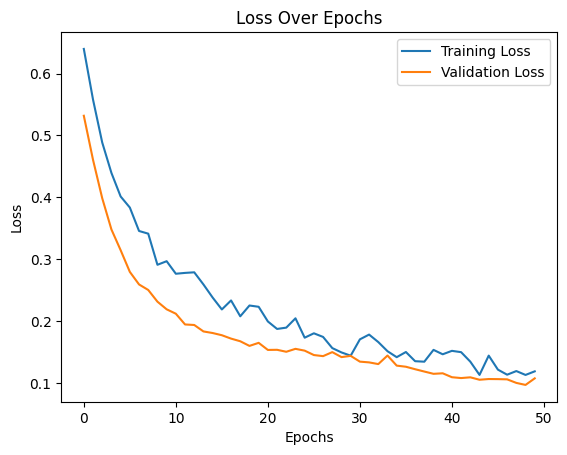

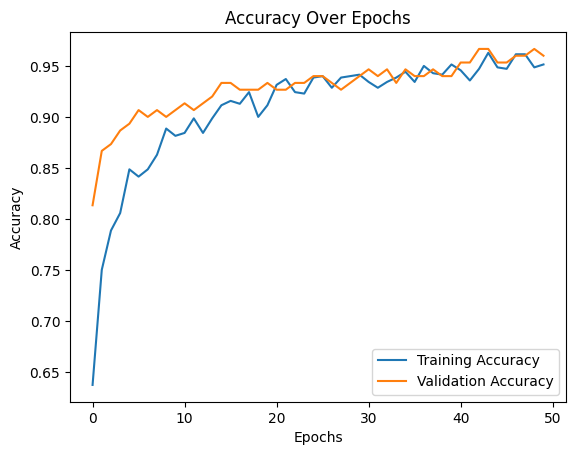

In [ ]:
# 1. 데이터 준비
# 예제 데이터 생성 (여기서는 임의로 데이터를 생성합니다. 실제 데이터로 교체 가능)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
n_redundant=5, random_state=42)
# 데이터 분할: 훈련, 검증, 테스트 데이터셋
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,
random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
test_size=0.5, random_state=42)
# 데이터 정규화 (특성 스케일링)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



# 2. 모델 설계
# 입력층, 은닉층, 출력층으로 구성된 이진 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # 입력층
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층
    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한 Dropout
    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
    ])




# 3. 모델 컴파일
# 손실 함수: Binary Cross-Entropy
# 최적화 알고리즘: Adam
# 평가지표: Accuracy
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])



# 4. Early Stopping 설정
# 과적합 방지. 검증 데이터 손실이 개선되지 않으면 학습을 조기에 종료
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



# 5. 모델 훈련
history = model.fit(X_train, y_train,
validation_data=(X_val, y_val),
epochs=50,
batch_size=32,
callbacks=[early_stopping])



# 6. 모델 평가
# 테스트 데이터로 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



# 7. 예측
# 새로운 데이터에 대한 예측 수행
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int) # 0.5를 기준으로 클래스 결정



# 8. 분류 보고서 출력
# 실제 값과 예측 값을 비교하여 성능 지표 확인
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))



# 9. 학습 결과 시각화 (Optional)
# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### MNIST 데이터셋을 활용한 이미지 분류

In [12]:
# 필요한 라이브러리 가져오기
from tensorflow.keras.models import Sequential # 순차적 모델 생성
from tensorflow.keras.layers import Dense # 완전 연결(Dense) 층
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩
from tensorflow.keras.datasets import mnist # MNIST 데이터셋 가져오기



# 1. 데이터 로드 및 전처리
# MNIST 데이터셋을 훈련 세트와 테스트 세트로 분리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 입력 데이터(이미지)를 1차원 벡터로 변환하고 정규화 (0~1 범위로 스케일링)
x_train = x_train.reshape(-1, 784) / 255.0 # 28x28 이미지를 784 길이의 벡터로 변환
x_test = x_test.reshape(-1, 784) / 255.0
# 레이블(출력 값)을 원-핫 인코딩 (예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



# 2. 모델 구성
model = Sequential([
    # 첫 번째 은닉층: 뉴런 128개, 활성화 함수 ReLU, 입력 크기는 784
    Dense(128, activation='relu', input_shape=(784,)),
    # 두 번째 은닉층: 뉴런 64개, 활성화 함수 ReLU
    Dense(64, activation='relu'),
    # 출력층: 뉴런 10개 (클래스 수), 활성화 함수 Softmax
    Dense(10, activation='softmax')
    ])



# 3. 모델 컴파일
# 손실 함수: Categorical Crossentropy
# 옵티마이저: Adam (효율적인 경사 하강법 알고리즘)
# 평가 지표: 정확도 (accuracy)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# 4. 모델 훈련
# 훈련 데이터(x_train, y_train)로 학습, 검증 데이터로 성능 확인
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



# 5. 모델 평가
# 테스트 데이터(x_test, y_test)로 모델 성능 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_accuracy}")



# 6. 예측
# 테스트 데이터의 첫 번째 샘플을 예측
predictions = model.predict(x_test[:1])
print(f"Softmax 출력: {predictions[0]}") # 각 클래스에 대한 확률 값
print(f"예측 클래스: {predictions.argmax()}") # 확률이 가장 높은 클래스

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


c:\project\SK_tensor_project\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8607 - loss: 0.4739 - val_accuracy: 0.9573 - val_loss: 0.1458
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9640 - loss: 0.1200 - val_accuracy: 0.9635 - val_loss: 0.1229
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9774 - loss: 0.0739 - val_accuracy: 0.9708 - val_loss: 0.0976
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9826 - loss: 0.0563 - val_accuracy: 0.9731 - val_loss: 0.0920
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9719 - val_loss: 0.0969
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9890 - loss: 0.0339 - val_accuracy: 0.9739 - val_loss: 0.0945
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9910 - loss: 0.0291 - val_accuracy: 0.9762 - val_loss: 0.0987
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accurac